# Heart Disease Research Part II

`Details:`


- `age`: age in years
- `sex`: sex assigned at birth; 'male' or 'female'
- `trestbps`: resting blood pressure in mm Hg
- `chol`: serum cholesterol in mg/dl
- `cp`: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- `exang`: whether the patient experiences exercise-induced angina (1: yes; 0: no)
- `fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- `thalach`: maximum heart rate achieved in exercise test
- `heart_disease`: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [4]:
heart = pd.read_csv('heart_disease_2.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


### Investigation. Is thalach associated with heart disease?

In [15]:
# Check mean difference betwwen with heart disease and without heart disease
heart.groupby('heart_disease').mean()

,age,trestbps,chol,exang,fbs,thalach
heart_disease,,,,,,
absence,52.585366,129.250000,242.640244,0.140244,0.140244,158.378049
presence,56.625899,134.568345,251.474820,0.546763,0.158273,139.258993


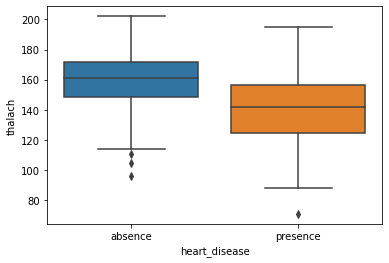

<Figure size 432x288 with 0 Axes>

In [42]:
sns.boxplot(x='heart_disease', y='thalach', data=heart)
plt.show()
plt.clf()

In [5]:
# seperate 'thalach' value with heart disease and without heart disease
thalach_hd = heart.thalach[heart['heart_disease'] == 'presence']
thalach_no_hd = heart.thalach[heart['heart_disease'] == 'absence']

In [6]:
# difference in mean and meadian
print(np.mean(thalach_no_hd) - np.mean(thalach_hd))
print(np.median(thalach_no_hd) - np.median(thalach_hd))

19.11905597473242
19.0


### Hypothesis Testing, Two Sample T Test (comparing popultion mean)

Null: Avg thalach value is not significantly differennt from person with heart  disease and without heart disease

Alternative: The avg thalach of a person w/ HD is not equal to w/o HD.

### Check standard devation ratio first
Generally, a ratio between 0.9 and 1.1 should suffice.

In [40]:
ratio = np.std(thalach_hd) / np.std(thalach_no_hd)
print(ratio)

1.1761378584838222


In [41]:
tstat, pval =ttest_ind(thalach_no_hd,thalach_hd)
print(pval)
print('{:.20f}'.format(pval))
# Reject the null hypothesis

3.456964908430172e-14
0.00000000000003456965


## Further Analysis
Creating a simulation to test out hypothesis

Pending... WIP

## Conclusion

Rejecting the null hypothesis.

Person with LOW thalach value (Maximum heart rate during exercise) tend to have a heart disease.

### Investigating  age,trestpbs,chol if associated with heart disease

Text(0.5, 1.0, 'Chol vs. Heart Disease')

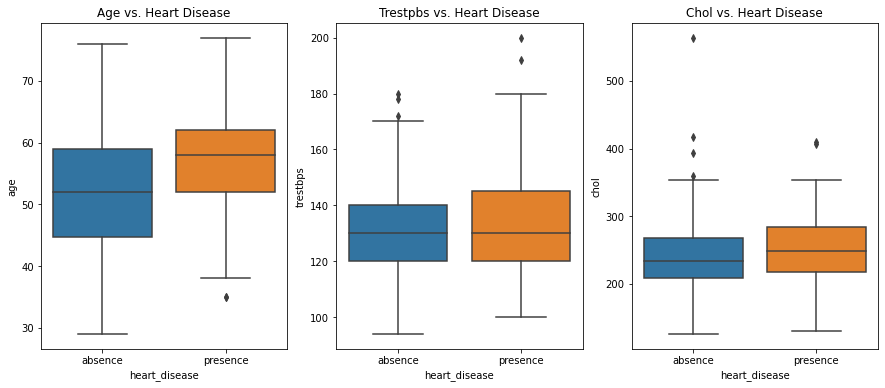

In [22]:
plt.figure(figsize=(15, 6)) 

# age vs heart disease
ax1 = plt.subplot(1,3,1)
sns.boxplot(x='heart_disease', y='age', data=heart)
plt.title('Age vs. Heart Disease')

# trestpbs vs heart disease
ax2 = plt.subplot(1,3,2)
sns.boxplot(x='heart_disease', y='trestbps', data=heart)
plt.title('Trestpbs vs. Heart Disease')

# chol vs heart disease
ax3 = plt.subplot(1,3,3)
sns.boxplot(x='heart_disease', y='chol', data=heart)
plt.title('Chol vs. Heart Disease')

### Setting up variables

In [26]:
# 'age' value with heart disease and no heart disease
age_hd = heart.age[heart['heart_disease'] == 'presence']
age_no_hd = heart.age[heart['heart_disease'] == 'absence']

# 'trestpbs' value with heart disease and no heart disease
trestbps_hd = heart.trestbps[heart['heart_disease'] == 'presence']
trestbps_no_hd = heart.trestbps[heart['heart_disease'] == 'absence']

# 'chol' value with heart disease and no heart disease
chol_hd = heart.chol[heart['heart_disease'] == 'presence']
chol_no_hd = heart.chol[heart['heart_disease'] == 'absence']

### Check standard devation ratio first
Generally, a ratio between 0.9 and 1.1 should suffice.

In [28]:
ratio_age = np.std(age_hd) / np.std(age_no_hd)
ratio_trestbps = np.std(trestbps_hd) / np.std(trestbps_no_hd)
ratio_chol = np.std(chol_hd) / np.std(chol_no_hd)
print(ratio_age, ratio_trestbps, ratio_chol )

0.83411177228032 1.1576034590571467 0.9252280050863391


### Hypothesis Testing, Two Sample T Test

In [38]:
tstat, pval =ttest_ind(age_no_hd,age_hd)
print('Age vs Heart Disease P-val:' + '\n{:.20f}'.format(pval))

tstat, pval =ttest_ind(trestbps_no_hd, trestbps_hd)
print('\nTrestbps vs Heart Disease P-val:' + '\n{:.20f}'.format(pval))

tstat, pval =ttest_ind(chol_no_hd, chol_hd)
print('\nChol vs Heart Disease P-val:' + '\n{:.20f}'.format(pval))

Age vs Heart Disease P-val:
0.00008955636917529706

Trestbps vs Heart Disease P-val:
0.00854826892859492787

Chol vs Heart Disease P-val:
0.13914167020436526978


- Age vs Heart Disease: Significantly associated with heart disease.
- Trestpbs vs Heart Disease: Significantly associated with heart disease.
- Chol vs Heart Disease: chol is not significantly associated with heart disease.

### Association between Thalach(max heart rate at exercise) and the type of chestpain (cp).

In [43]:
heart.cp.unique()

array(['typical angina', 'asymptomatic', 'non-anginal pain',
       'atypical angina'], dtype=object)

<AxesSubplot:xlabel='cp', ylabel='thalach'>

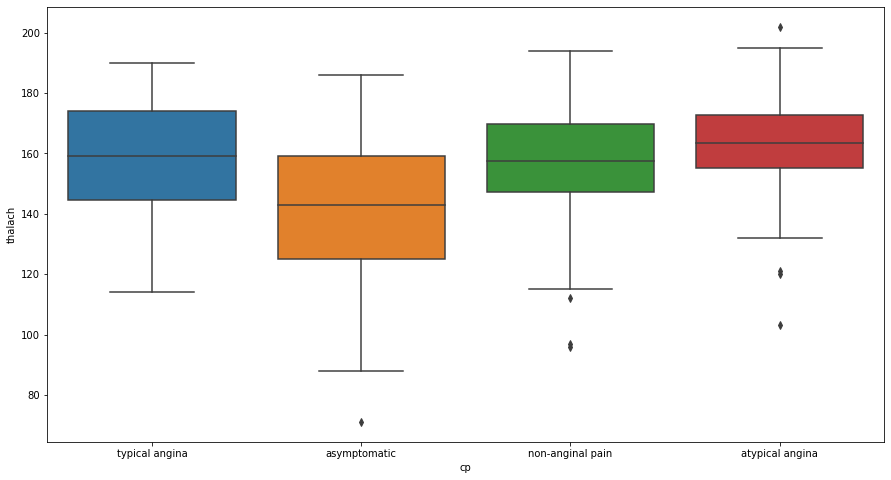

In [57]:
# Non binary/Categorical vs Quantitative variables (Anova and Turkey)
plt.figure(figsize=(15, 8)) 
sns.boxplot(x='cp', y='thalach', data=heart )

In [18]:
# store the data
thalach_typical_angina = heart.thalach[heart.cp == 'typical angina']
thalach_asymptomatic = heart.thalach[heart.cp == 'asymptomatic']
thalach_non_anginal_pain = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical_angina = heart.thalach[heart.cp == 'atypical angina']

In [19]:
# Double checking quantities
# Sum all
print(len(thalach_asymptomatic) +
      len(thalach_atypical_angina) +
      len(thalach_non_anginal_pain) +
      len(thalach_typical_angina))

# must equal
print(len(heart.cp))

303
303


### Hypothesis Testing, ANOVA (Non binary/Categorical vs Quantitative variables)

- Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
- Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

Be careful looking at P-val, if we look closely we can see `e-10` at the end. if we miss this, we will assume that the null hypothesis is True.

In [21]:
fstat, pval = f_oneway(thalach_typical_angina,
                       thalach_asymptomatic,
                       thalach_non_anginal_pain,
                       thalach_atypical_angina)
print(pval)
print('{:.20f}'.format(pval))

1.9065505247705008e-10
0.00000000019065505248


##### If the p-value is below our significance threshold, we can conclude that at least one pair of our groups earned significantly different scores on average however, we won’t know which pair until we investigate further!

- True = reject null / significant
- False = accept null / NOT significant

In [88]:
tukey_results =  pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


1. asymptomatic and atypical angina: Reject null
2. asymptomatic and non-anginal pain: Reject null
3. asymptomatic and typical angina: Reject null 
4. atypical angina and non-anginal pain: Accept null 
5. atypical angina and typical angina: Accept null 
6. non-anginal pain and typical angina: Accept null

People who are 'asymptomatic' seem to have a lower maximum heart rate (associated with heart disease) than people who have other kinds of chest pain.

## Investigating the relationship between the kind of chest pain a person experiences and whether or not they have heart disease


In [99]:
# Categories of both variables must be mutually exclusive
Contingency_table = pd.crosstab(heart.heart_disease, heart.cp)
Contingency_table

cp,asymptomatic,atypical angina,non-anginal pain,typical angina
heart_disease,,,,
absence,39,41,68,16
presence,105,9,18,7


### Hypothesis Testing, Chi square test (two categorical varibles)

- Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
- Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

In [101]:
chi2, pval, dof, expected = chi2_contingency(Contingency_table)
pval

1.2517106007837527e-17

We will accept the null hypothesis which means that there is no association between chest pain type and whether or not someone is diagnosed with heart disease. There's is no significant different if have or have not a heart disease anyone can get any type of chest pain.